# K-Means and VQ
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **K-Means clustering** algorithm
- play with the hyperparameter K 
- implement the Vector Quantization with K-Means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked.

In [2]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run your k-means algorithm on `kmeans_data.mat`. Note that the lines indicate the iterations of centroids.

637.4200237561756 771.7458654811335


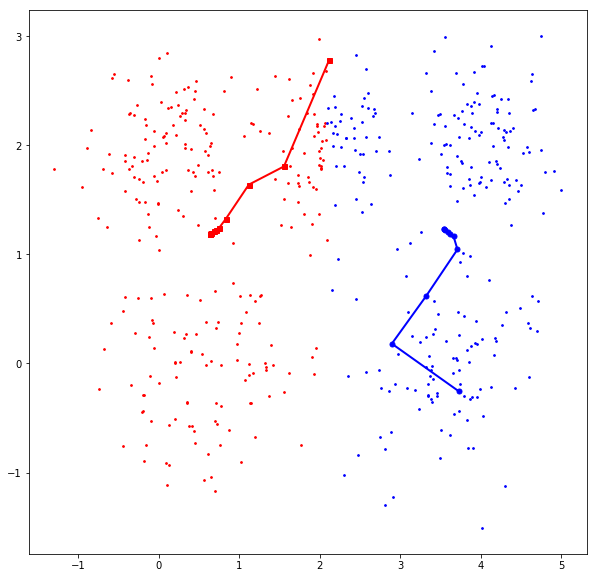

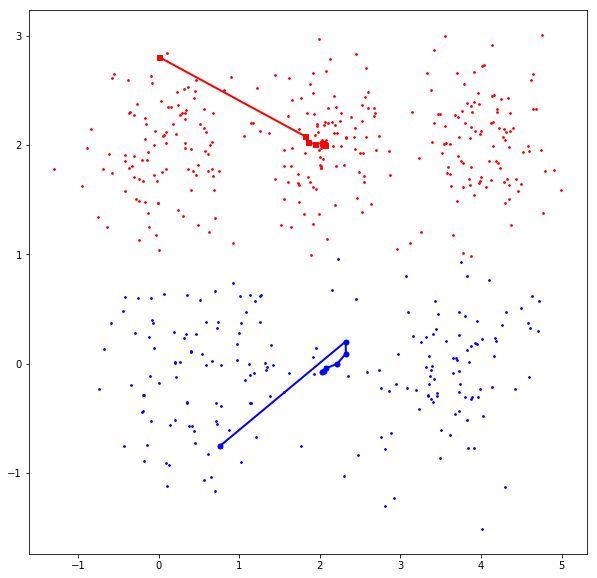

In [28]:
from kmeans import kmeans
from kmeans_plot import kmeans_plot
x = sio.loadmat('kmeans_data.mat')['X']
k = 2  # modify if you want
minSD, maxSD = 1e18, 0
record = [[], []]
for re in range(1000):
    idx, ctrs, iter_ctrs = kmeans(x, k)
    sumdist = 0
    for i in range(idx.shape[0]):
        sumdist += np.sqrt(np.sum((ctrs[idx[i]] - x[i])**2))
    if sumdist < minSD:
        minSD = sumdist
        record[0] = [idx, ctrs, iter_ctrs]
    if sumdist > maxSD:
        maxSD = sumdist
        record[1] = [idx, ctrs, iter_ctrs]
print (minSD, maxSD)
kmeans_plot(x, *record[0])
kmeans_plot(x, *record[1])

Run your k-means algorithm on the digit dataset `digit_data.mat`. 

(5000,) (10, 400) (10, 10, 400)
(5000,) (20, 400) (10, 20, 400)
(5000,) (50, 400) (10, 50, 400)


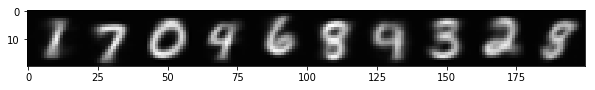

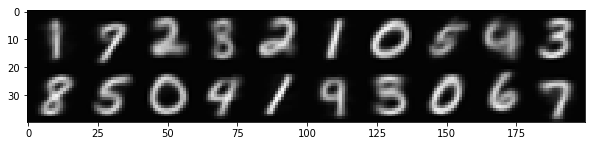

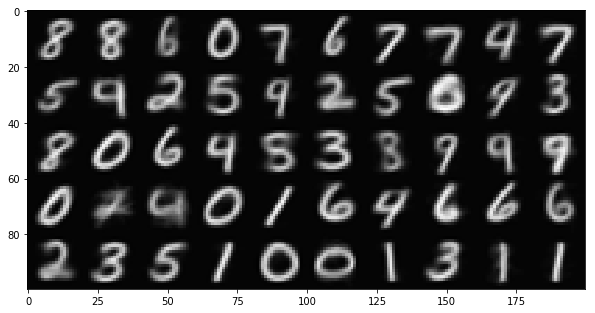

In [20]:
from show_digit import show_digit
x = sio.loadmat('digit_data.mat')['X']
for k in [10, 20, 50]:
    _, ctrs, _ = kmeans(x, k)
    show_digit(ctrs)

# Vector quantization
Compress images with K set to 8, 16, 32 and 64.

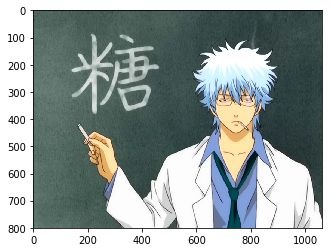

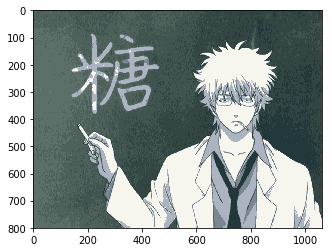

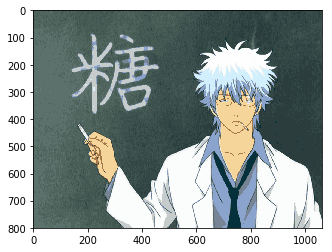

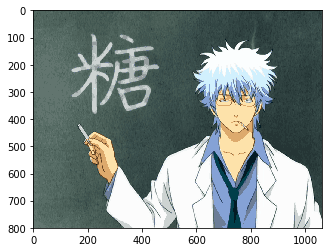

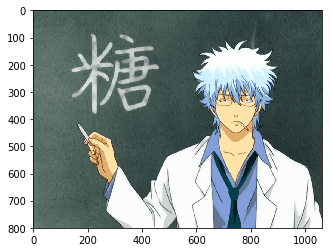

In [48]:
import kmeans
from matplotlib.pyplot import imread
img = imread('sample1.jpg')
fea = img.reshape((img.shape[0]*img.shape[1], 3)).astype(np.float64)
plt.imshow(fea.reshape(img.shape).astype(np.uint8))
plt.show()

# YOUR (SEVERAL LINES) CODE HERE
# begin answer
for k in [8, 16, 32, 64]:
    idx, ctrs, _ = kmeans.kmeans(fea.copy(), k)
    new_img = ctrs[idx]
    plt.imshow(new_img.reshape(img.shape).astype(np.uint8))
    plt.show()
# end answer
